Validation Metrics:
Interest - MAE: $2.33, RMSE: $2.75
Principal - MAE: $102.32, RMSE: $102.34
Remaining Balance - MAE: $382.41, RMSE: $467.98


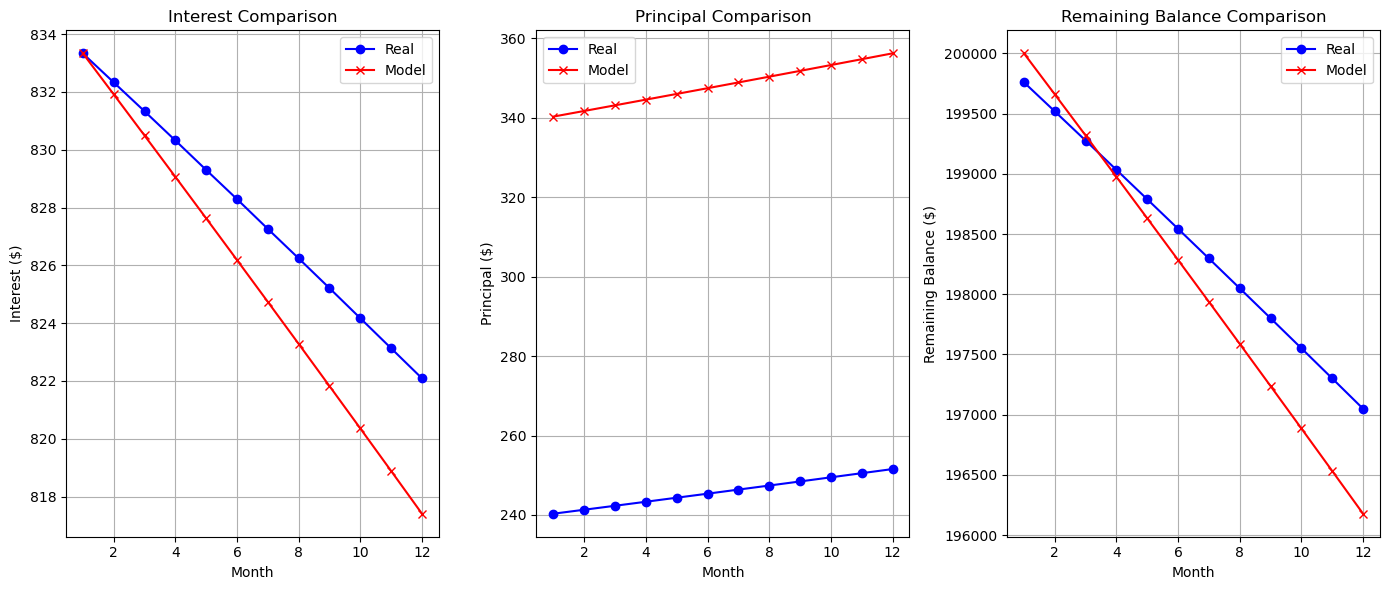

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Real-world data (example)
real_world_data = {
    "Month": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
    "Interest": [833.33, 832.33, 831.33, 830.32, 829.30, 828.29, 827.26, 826.24, 825.21, 824.17, 823.13, 822.09],
    "Principal": [240.31, 241.31, 242.31, 243.32, 244.34, 245.35, 246.38, 247.40, 248.43, 249.47, 250.51, 251.55],
    "Remaining Balance": [199759.69, 199518.38, 199276.07, 199032.75, 198788.41, 198543.06, 198296.68, 198049.28, 197800.85, 197551.38, 197300.87, 197049.32]
}
real_world_df = pd.DataFrame(real_world_data)

# Model parameters (same as real-world loan terms)
B0 = 200000  # Initial loan balance
r = 0.05 / 12  # Monthly interest rate (5% annual)
P = 1073.64  # Monthly payment (constant)
A = 100      # Monthly prepayment (constant)
F = 0        # Monthly fee (constant)
T = 30 * 12  # Loan term in months

# Discretization
dt = 1  # Time step (1 month)
N = int(T / dt)  # Number of time steps

# Initialize arrays
t = np.arange(0, T + dt, dt)  # Time array
B = np.zeros(len(t))  # Loan balance array
B[0] = B0  # Initial condition

# Euler's method
for k in range(len(t) - 1):
    dB_dt = r * B[k] - P - A + F  # Derivative
    B[k + 1] = B[k] + dt * dB_dt  # Update rule

# Generate model predictions
model_predictions = []
for month in range(len(t)):
    interest = r * B[month]
    principal = P + A - interest
    model_predictions.append({
        "Month": month + 1,
        "Interest": interest,
        "Principal": principal,
        "Remaining Balance": B[month]
    })

# Convert to DataFrame
model_df = pd.DataFrame(model_predictions)

# Compare model predictions with real-world data
comparison_df = pd.merge(real_world_df, model_df, on="Month", suffixes=("_real", "_model"))

# Calculate error metrics
mae_interest = mean_absolute_error(comparison_df["Interest_real"], comparison_df["Interest_model"])
rmse_interest = np.sqrt(mean_squared_error(comparison_df["Interest_real"], comparison_df["Interest_model"]))

mae_principal = mean_absolute_error(comparison_df["Principal_real"], comparison_df["Principal_model"])
rmse_principal = np.sqrt(mean_squared_error(comparison_df["Principal_real"], comparison_df["Principal_model"]))

mae_balance = mean_absolute_error(comparison_df["Remaining Balance_real"], comparison_df["Remaining Balance_model"])
rmse_balance = np.sqrt(mean_squared_error(comparison_df["Remaining Balance_real"], comparison_df["Remaining Balance_model"]))

print("Validation Metrics:")
print(f"Interest - MAE: ${mae_interest:.2f}, RMSE: ${rmse_interest:.2f}")
print(f"Principal - MAE: ${mae_principal:.2f}, RMSE: ${rmse_principal:.2f}")
print(f"Remaining Balance - MAE: ${mae_balance:.2f}, RMSE: ${rmse_balance:.2f}")

# Plot comparison
plt.figure(figsize=(14, 6))

# Plot 1: Interest Comparison
plt.subplot(1, 3, 1)
plt.plot(comparison_df["Month"], comparison_df["Interest_real"], label="Real", marker="o", color="blue")
plt.plot(comparison_df["Month"], comparison_df["Interest_model"], label="Model", marker="x", color="red")
plt.xlabel("Month")
plt.ylabel("Interest ($)")
plt.title("Interest Comparison")
plt.grid()
plt.legend()

# Plot 2: Principal Comparison
plt.subplot(1, 3, 2)
plt.plot(comparison_df["Month"], comparison_df["Principal_real"], label="Real", marker="o", color="blue")
plt.plot(comparison_df["Month"], comparison_df["Principal_model"], label="Model", marker="x", color="red")
plt.xlabel("Month")
plt.ylabel("Principal ($)")
plt.title("Principal Comparison")
plt.grid()
plt.legend()

# Plot 3: Remaining Balance Comparison
plt.subplot(1, 3, 3)
plt.plot(comparison_df["Month"], comparison_df["Remaining Balance_real"], label="Real", marker="o", color="blue")
plt.plot(comparison_df["Month"], comparison_df["Remaining Balance_model"], label="Model", marker="x", color="red")
plt.xlabel("Month")
plt.ylabel("Remaining Balance ($)")
plt.title("Remaining Balance Comparison")
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()